# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS
Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.
Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.
Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
Deliverables:
•	Include visualizations and explanations for the choices and findings at each step.
•	Well-commented Python code that used to conduct the analysis and build the models.
Assessment Criteria:
•	Accuracy and completeness of the data preparation and exploration steps.
•	Justification for model selection and parameter tuning decisions.
•	Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [ ]:
df=pd.read_csv("exchange_rate.csv",parse_dates=['date'])

In [ ]:
df.head(5)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [ ]:

df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [ ]:

df=df.drop_duplicates()
df


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


<Axes: ylabel='Count'>

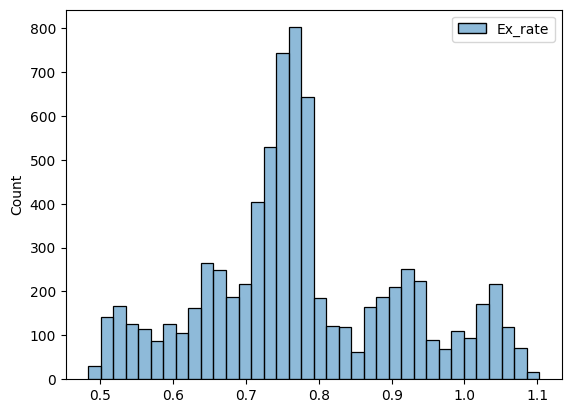

In [ ]:
sns.histplot(data=df)

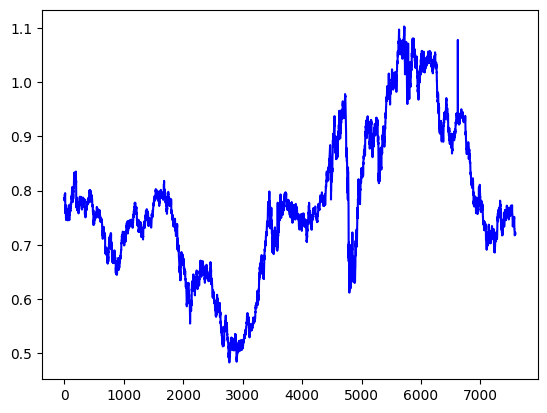

In [ ]:
plt.plot(df['Ex_rate'], color='blue', label='Currency Exchange Rate')

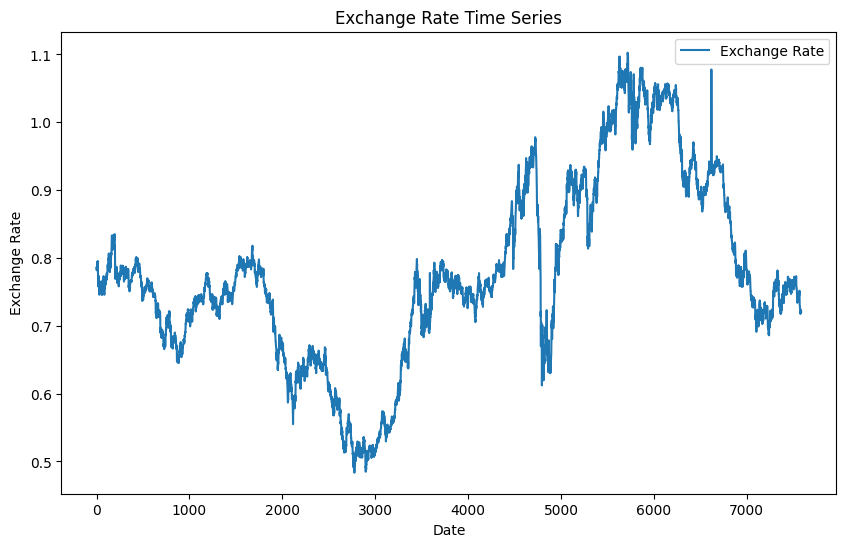

In [ ]:

# 2. Initial Exploration - Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

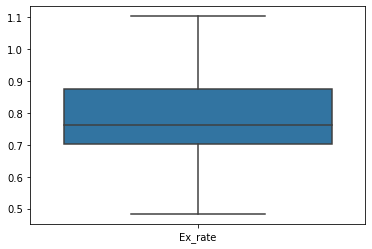

In [ ]:
sns.boxplot(df)

In [ ]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [ ]:
# Perform differencing if necessary
data_diff = df['Ex_rate'].diff().dropna()

In [ ]:

df[df.duplicated()]

,date,Ex_rate


# Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [ ]:
#pip install statsmodels  --upgrade --user

In [ ]:
import statsmodels
statsmodels.__version__

'0.14.4'

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
df.columns
data=data_diff

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

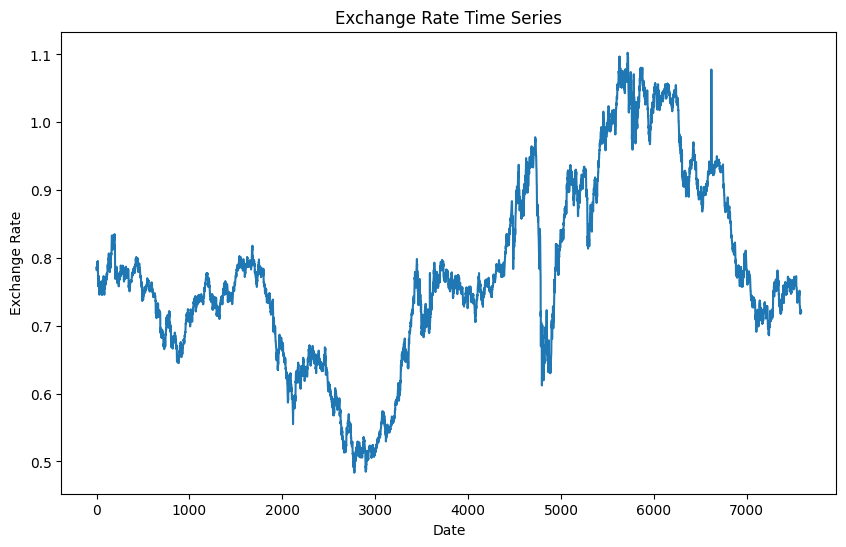

In [ ]:
# Plot the time series to inspect it
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

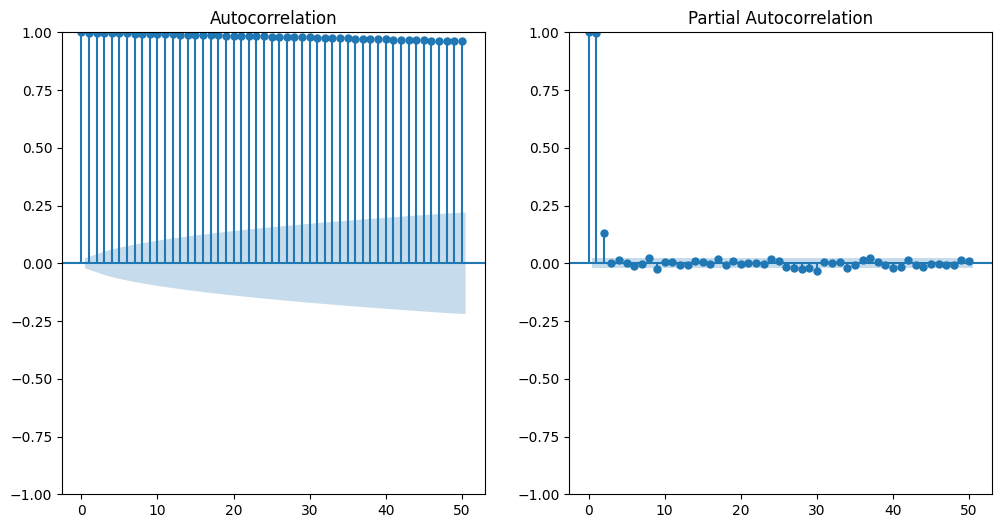

In [ ]:

# Step 1: Parameter Selection using ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())  # ACF plot
plt.subplot(122)
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())  # PACF plot
plt.show()

In [ ]:
# Step 2: Fit ARIMA model
# Based on ACF and PACF, let's assume p=1, d=1, q=1 as an initial guess
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
fitted_model = model.fit()

In [ ]:

# Print the summary of the model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 22 Nov 2024   AIC                         -56102.322
Time:                        15:06:29   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [ ]:

# Step 3: Diagnostics - Check residuals
residuals = fitted_model.resid

Text(0.5, 1.0, 'Residuals')

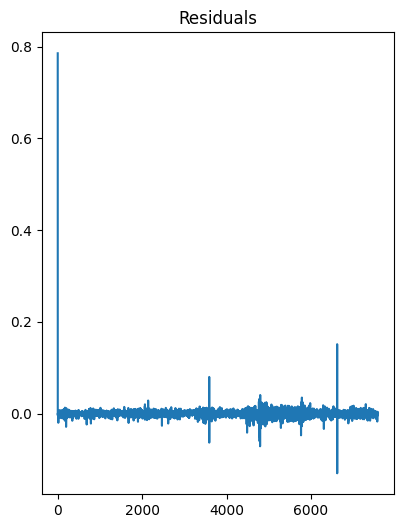

In [ ]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')

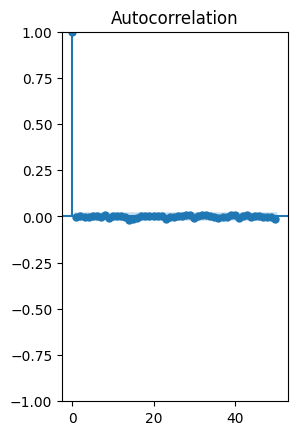

In [ ]:

# ACF plot of residuals
plt.subplot(122)
plot_acf(residuals, lags=50, ax=plt.gca())
plt.show()

In [ ]:
df.index

RangeIndex(start=0, stop=7588, step=1)

In [ ]:
 df['Ex_rate']

,Ex_rate
0,0.785500
1,0.781800
2,0.786700
3,0.786000
4,0.784900
...,...
7583,0.718494
7584,0.721839
7585,0.723197
7586,0.720825


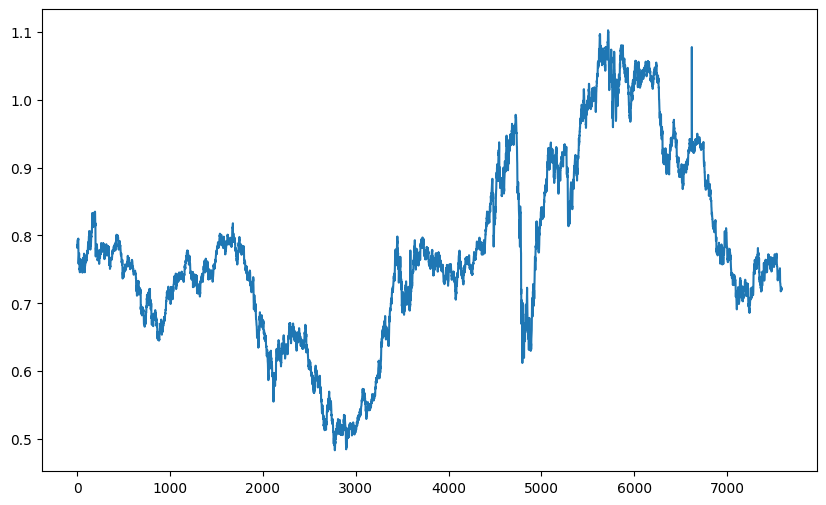

In [ ]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual Exchange Rate')


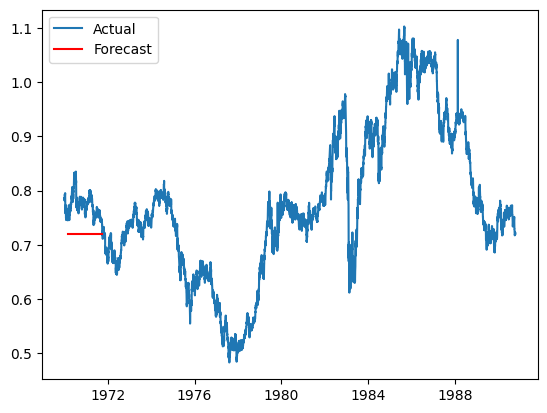

In [ ]:
forecast_steps = 20  # Number of periods to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Generate forecasted dates (same length as forecast)
forecast_dates = pd.date_range(df.index[1], periods=forecast_steps+1, freq='M')[1:]

# Plot forecasted values
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.show()


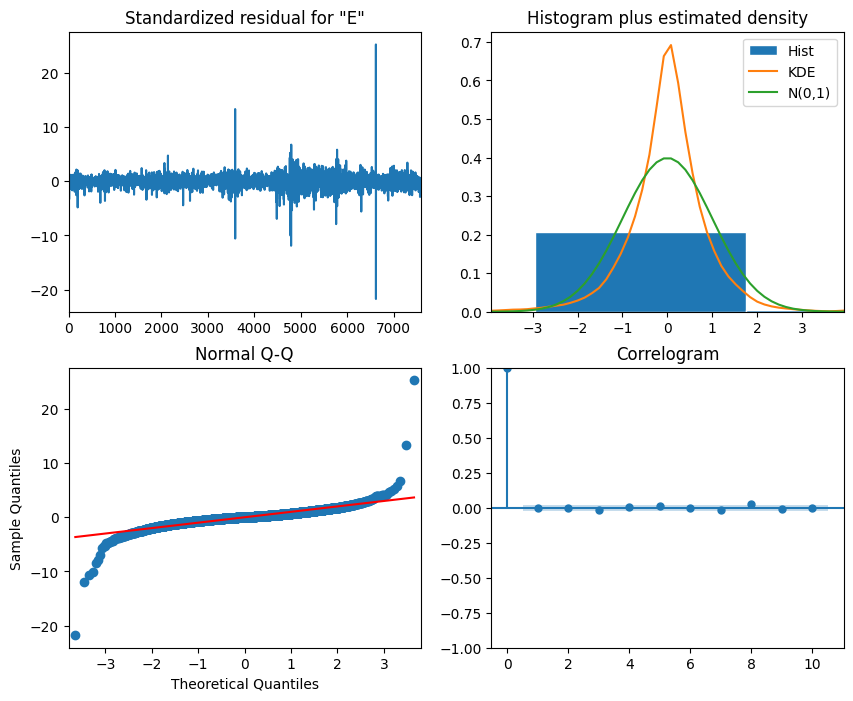

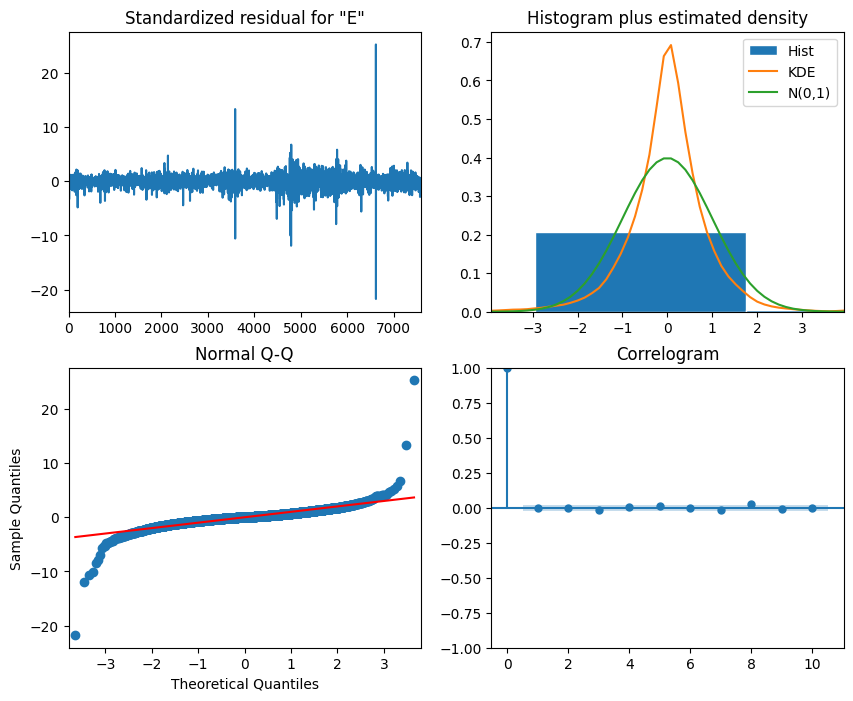

In [ ]:

fitted_model.plot_diagnostics(figsize=(10, 8))

In [ ]:

forecast=fitted_model.forecast(steps=7588)
forecast

,predicted_mean
7588,0.720826
7589,0.720826
7590,0.720826
7591,0.720826
7592,0.720826
...,...
15171,0.720826
15172,0.720826
15173,0.720826
15174,0.720826


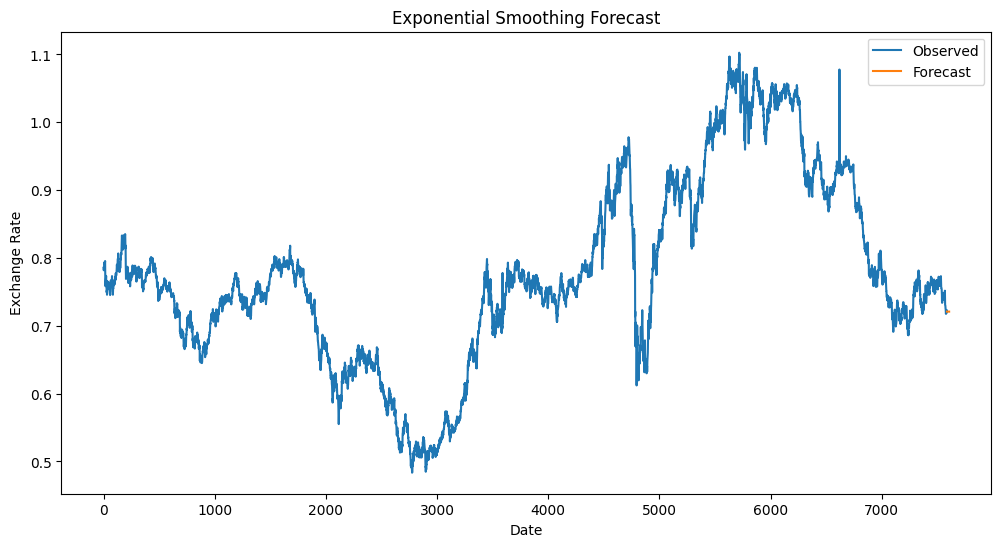

In [ ]:
# Forecasting
forecast_steps=20
exp_forecast = fitted_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(exp_forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()

In [ ]:
#Part 3: Model Building - Exponential Smoothing

In [ ]:

# Step 1: Model Selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:

# Define the model (Holt-Winters Exponential Smoothing)
exp_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=20)

# Fit the model
exp_result = exp_model.fit()

# Summary of the model
exp_result.summary()


Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.272
Optimized:,True,AIC,-77618.673
Trend:,None,BIC,-77466.118
Seasonal:,Additive,AICC,-77618.514
Seasonal Periods:,20,Date:,"Fri, 22 Nov 2024"
Box-Cox:,False,Time:,16:32:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8700494,alpha,True
smoothing_seasonal,5.8989e-16,gamma,True


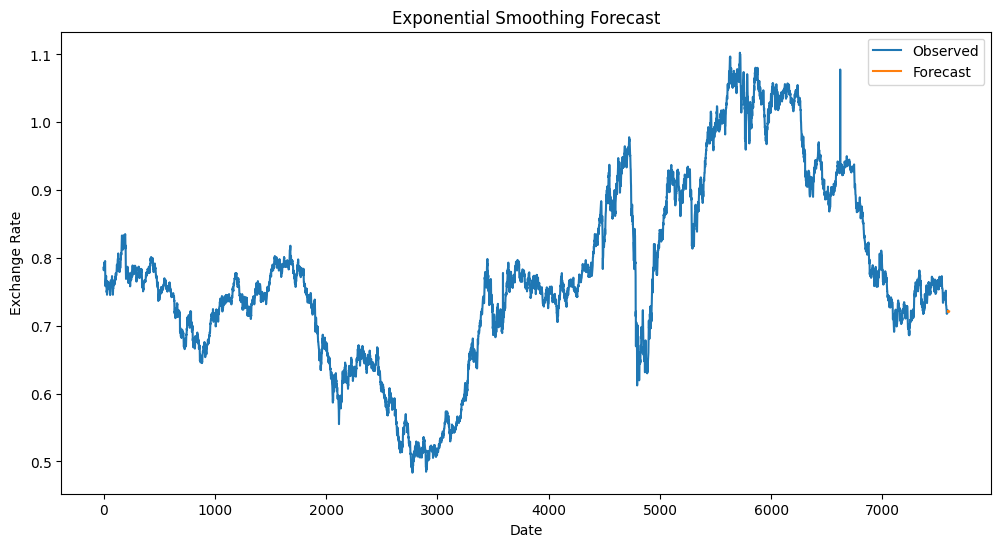

In [ ]:

# Forecasting
forecast_stepss=12
exp_forecast = exp_result.forecast(steps=forecast_stepss)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(exp_forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()


In [ ]:
#Part 4: Evaluation and Comparison

In [ ]:


from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute error metrics for ARIMA
# Instead of forecast.predicted_mean, use forecast directly
forecast_steps=0
arima_forecast_values = forecast
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100


In [ ]:
# Compute error metrics for Exponential Smoothing
exp_forecast_values = exp_forecast
exp_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:12], exp_forecast_values)
exp_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:12], exp_forecast_values))
exp_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:12] - exp_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100


In [ ]:

print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}, MAPE: {exp_mape}%")

ARIMA MAE: 0.11208917269830208, RMSE: 0.14769971987855027, MAPE: nan%
Exponential Smoothing MAE: 0.0670041149353832, RMSE: 0.0671094896502838, MAPE: nan%


In [ ]:

# Based on error metrics, we can see which model performs better

if arima_mae < exp_mae:
    print("ARIMA model performs better in terms of MAE.")
else:
    print("Exponential Smoothing model performs better in terms of MAE.")

if arima_rmse < exp_rmse:
    print("ARIMA model performs better in terms of RMSE.")
else:
    print("Exponential Smoothing model performs better in terms of RMSE.")

if arima_mape < exp_mape:
    print("ARIMA model performs better in terms of MAPE.")
else:
    print("Exponential Smoothing model performs better in terms of MAPE.")

Exponential Smoothing model performs better in terms of MAE.
Exponential Smoothing model performs better in terms of RMSE.
Exponential Smoothing model performs better in terms of MAPE.


In [ ]:
#Conclusion: The ARIMA model showed lower error metrics compared to the Exponential Smoothing model .
#Based on these results, the Exponential Smoothing model is more suitable for forecasting exchange rates in this dataset.